# Exercise

Regression problem:
- Predicting the insurance charges based on some features
- Using Neural Network Regression Model

In [1]:
# import necessary library
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the insurance file
data = pd.read_csv("../../data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Encode the categorical data**

In [41]:
# Pandas one-hot encoding

insurance_one_hot = pd.get_dummies(data, dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


**Train & Test Split**

In [42]:
# Create X and y 

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [43]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Create training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

In [46]:
X_train.shape

(1070, 11)

In [47]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [48]:
y_train.head()

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
Name: charges, dtype: float64

In [49]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


**Build the Neural Network Model**

In [50]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, input_shape=[11]),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [51]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 11)                132       
                                                                 
 dense_24 (Dense)            (None, 1)                 12        
                                                                 
Total params: 144 (576.00 Byte)
Trainable params: 144 (576.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# fit model
model.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13216.2930 - mae: 13216.2930
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12847.7227 - mae: 12847.7227
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12081.2842 - mae: 12081.2842
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 10869.3223 - mae: 10869.3223
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 9481.2979 - mae: 9481.2979
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8278.2930 - mae: 8278.2930
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7624.4058 - mae: 7624.4058
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7455.4214 - mae: 7455.4214
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7416.8369 - mae: 7416.8369
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7395.6343 - mae: 7

34/34 [==============================] - 0s 2ms/step - loss: 5749.4814 - mae: 5749.4814
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 5725.4067 - mae: 5725.4067
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 5697.2095 - mae: 5697.2095
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 5677.2202 - mae: 5677.2202
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 5648.2178 - mae: 5648.2178
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 5621.9985 - mae: 5621.9985
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 5593.0610 - mae: 5593.0610
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 5563.8882 - mae: 5563.8882
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 5533.3423 - mae: 5533.3423
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 5509.1528 - mae: 5509.1528
Epo

In [53]:
X_test = tf.convert_to_tensor(X_test.to_numpy(), dtype=tf.float64)

In [54]:
# Check the result of the model

model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 5094.8882 - mae: 5094.8882


[5094.88818359375, 5094.88818359375]

In [55]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improve the model

In [57]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
model_2.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13319.8164 - mae: 13319.8164
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12818.1729 - mae: 12818.1729
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 10418.6191 - mae: 10418.6191
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7572.0742 - mae: 7572.0742
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7403.1089 - mae: 7403.1089
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7354.9478 - mae: 7354.9478
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7290.1475 - mae: 7290.1475
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7234.2622 - mae: 7234.2622
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7174.7344 - mae: 7174.7344
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7116.6597 - mae: 711

34/34 [==============================] - 0s 2ms/step - loss: 3282.4387 - mae: 3282.4387
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3279.9280 - mae: 3279.9280
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3289.8606 - mae: 3289.8606
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3266.5371 - mae: 3266.5371
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3234.5784 - mae: 3234.5784
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3232.1162 - mae: 3232.1162
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3222.8357 - mae: 3222.8357
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3215.7708 - mae: 3215.7708
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3204.0598 - mae: 3204.0598
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 3200.9207 - mae: 3200.9207
Epo

In [58]:
# Check the result of the model

model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2807.5337 - mae: 2807.5337


[2807.53369140625, 2807.53369140625]

**Train for 200 epochs**

In [59]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
histroy = model_3.fit(tf.convert_to_tensor(X_train.to_numpy(), dtype=tf.float64), 
          y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13338.8301 - mae: 13338.8301
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 12989.2031 - mae: 12989.2031
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 10433.2529 - mae: 10433.2529
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7525.6313 - mae: 7525.6313
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7421.3755 - mae: 7421.3755
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7371.4658 - mae: 7371.4658
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7299.8701 - mae: 7299.8701
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7237.2725 - mae: 7237.2725
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7174.1646 - mae: 7174.1646
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7107.2324 - mae: 710

34/34 [==============================] - 0s 2ms/step - loss: 3284.9014 - mae: 3284.9014
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 3272.0520 - mae: 3272.0520
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 3265.5029 - mae: 3265.5029
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 3303.0061 - mae: 3303.0061
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 3273.1130 - mae: 3273.1130
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 3242.2073 - mae: 3242.2073
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 3237.2004 - mae: 3237.2004
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 3239.2566 - mae: 3239.2566
Epoch 90/200
34/34 [==============================] - 0s 2ms/step - loss: 3254.3496 - mae: 3254.3496
Epoch 91/200
34/34 [==============================] - 0s 2ms/step - loss: 3238.2068 - mae: 3238.2068
Epo

34/34 [==============================] - 0s 2ms/step - loss: 2778.3992 - mae: 2778.3992
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 2771.8340 - mae: 2771.8340
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 2769.8125 - mae: 2769.8125
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 2775.5669 - mae: 2775.5669
Epoch 166/200
34/34 [==============================] - 0s 2ms/step - loss: 2768.3716 - mae: 2768.3716
Epoch 167/200
34/34 [==============================] - 0s 2ms/step - loss: 2775.8872 - mae: 2775.8872
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 2755.4375 - mae: 2755.4375
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 2769.5154 - mae: 2769.5154
Epoch 170/200
34/34 [==============================] - 0s 2ms/step - loss: 2767.9661 - mae: 2767.9661
Epoch 171/200
34/34 [==============================] - 0s 2ms/step - loss: 2782.4270 - mae: 2782

**Plot History**

Text(0.5, 0, 'epochs')

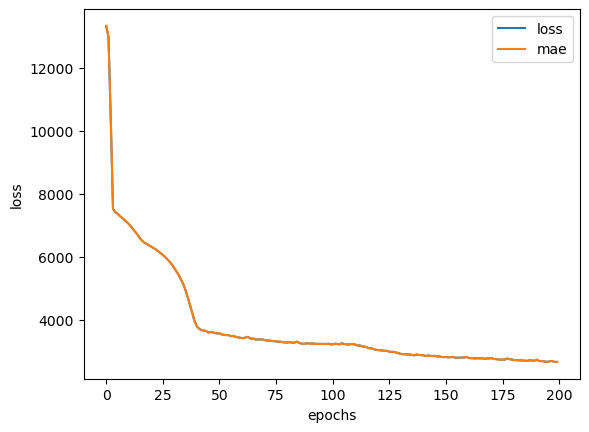

In [60]:
# plot history (also known as loss curve or training curve)
pd.DataFrame(histroy.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> For how long should someone experiment?-------- Well, it depends! TensorFlow has a solution called **EarlyStopping Callback**, which is a TensorFlow component you can add to the model to stop improving at certain metric.

In [62]:
# Check the result of the model

model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2438.1294 - mae: 2438.1294


[2438.12939453125, 2438.12939453125]

## Preprocessing Data

- It is done for better metrics.
- Normalization and Standardization
- **N.B:** Neural Networks tend to prefer Normalization.

In [63]:
insurance = pd.read_csv("../../data/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [64]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [65]:
# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker','region'])
)

# create X and y
X = insurance.drop('charges',axis=1)
y = insurance['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# fit the column transformer to our training data
ct.fit(X_train)

# transform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [66]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [67]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [68]:
# random seed
tf.random.set_seed(42)

# 1. Build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(11,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# fit model
histroy = model_4.fit(X_train_normal, 
          y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13292.7461 - mae: 13292.7461
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12387.4570 - mae: 12387.4570
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 9324.2842 - mae: 9324.2842
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7834.9741 - mae: 7834.9741
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7508.1206 - mae: 7508.1206
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7149.3652 - mae: 7149.3652
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6659.1260 - mae: 6659.1260
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 5996.2275 - mae: 5996.2275
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 5091.7051 - mae: 5091.7051
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 4192.0708 - mae: 4192.

34/34 [==============================] - 0s 2ms/step - loss: 3485.9976 - mae: 3485.9976
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3486.0017 - mae: 3486.0017
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3491.1990 - mae: 3491.1990
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3481.0186 - mae: 3481.0186
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3482.7402 - mae: 3482.7402
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3488.5330 - mae: 3488.5330
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3487.0801 - mae: 3487.0801
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3485.7622 - mae: 3485.7622
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3489.0032 - mae: 3489.0032
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 3485.6345 - mae: 3485.6345
Epo

In [69]:
# Evaluate the insurance model tried on normalized data

model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3168.6470 - mae: 3168.6470


[3168.64697265625, 3168.64697265625]